# Emanuel Naval y Nicolás Velandia
---
# Proyecto 2
## Algoritmo para la detección y conteo de leucocitos

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [45]:
plt.figure()
# Configuración para los plots debido al Dark Theme de VS Code
plt.rcParams.update({"figure.facecolor": "white"})

<Figure size 640x480 with 0 Axes>

---

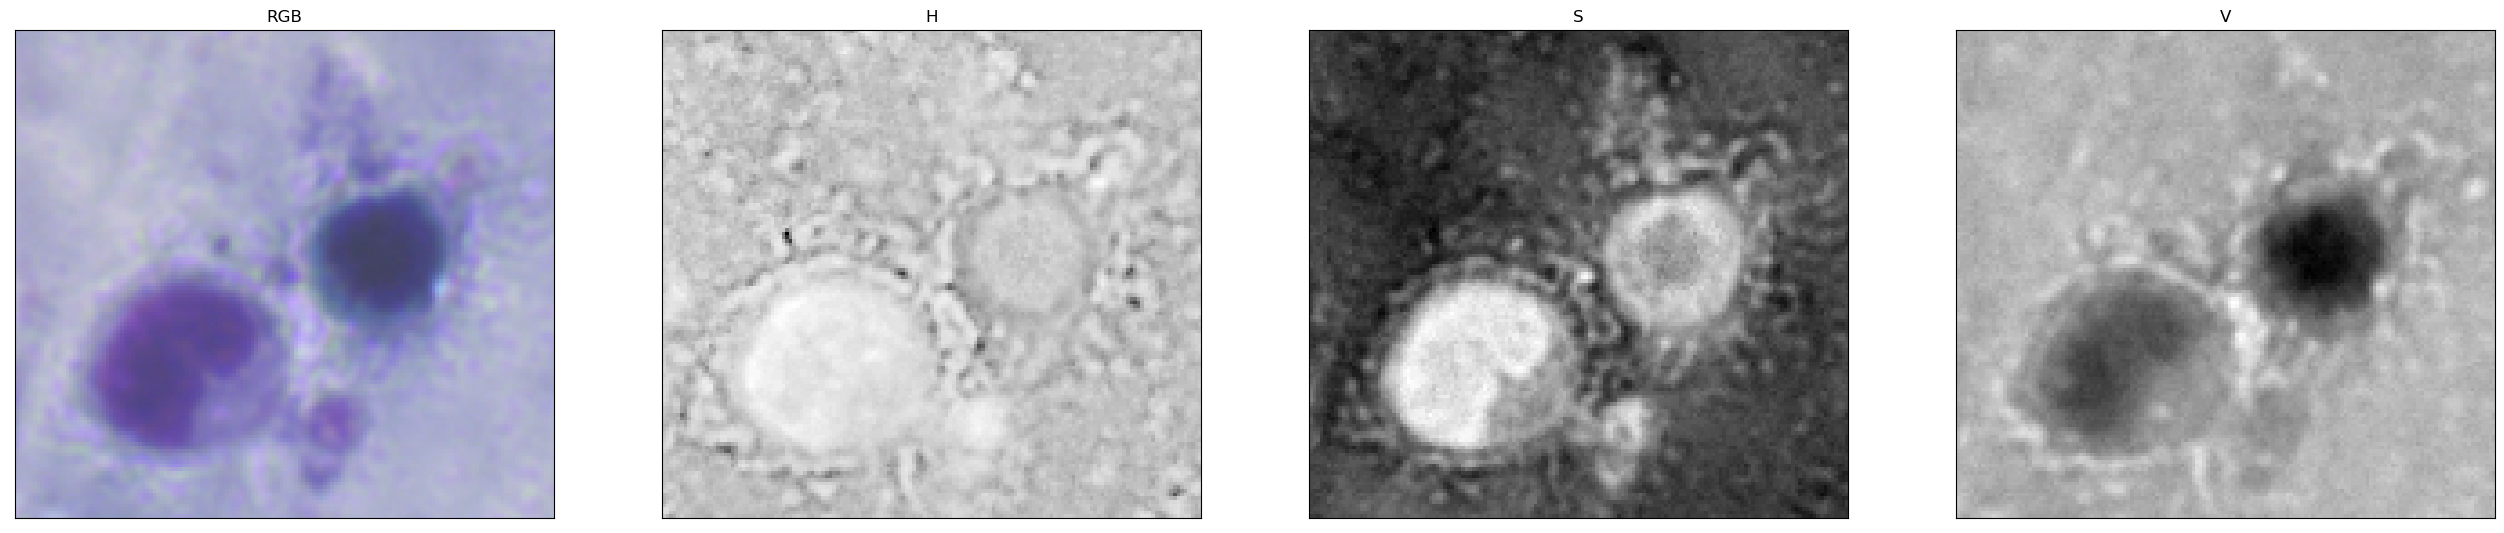

In [46]:
# Trabajar con un sample para identificar los valores de brillo que contienen los leucocitos
sample = cv2.imread('sample1.png')
sample_rgb = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
sample_hsv = cv2.cvtColor(sample, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(sample_hsv)

plt.figure(figsize=(32,16))

plt.subplot(141) # Posición 1 de 4
plt.title('RGB')
plt.imshow(sample_rgb)
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.subplot(142) # Posición 2 de 4
plt.title('H')
plt.imshow(H, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.subplot(143) # Posición 3 de 4
plt.title('S')
plt.imshow(S, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.subplot(144) # Posición 3 de 4
plt.title('V')
plt.imshow(V, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.show()

101 228 195.03191648023864


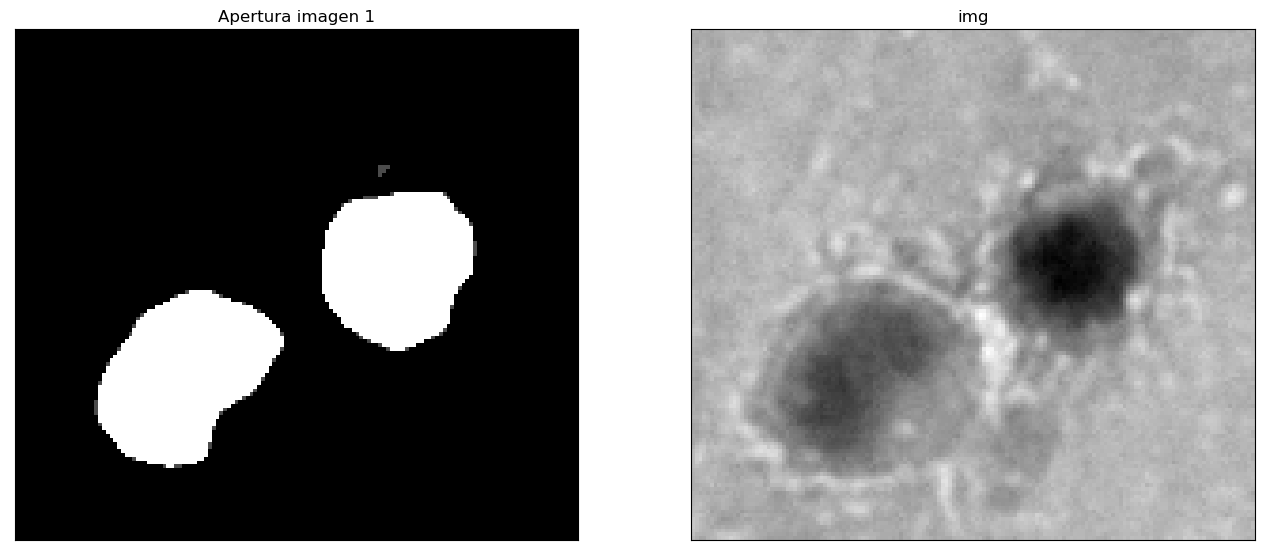

In [47]:
openning = cv2.GaussianBlur(V, (9,9), 7)
print(np.min(openning), np.max(openning), np.average(openning))
mid = 180
openning[openning < mid] = 0
openning[openning > mid] = 255
openning = cv2.bitwise_not(openning)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('Apertura imagen 1')
plt.imshow(openning,cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('img')
plt.imshow(V, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
# openning

25 134 59.634551329853345


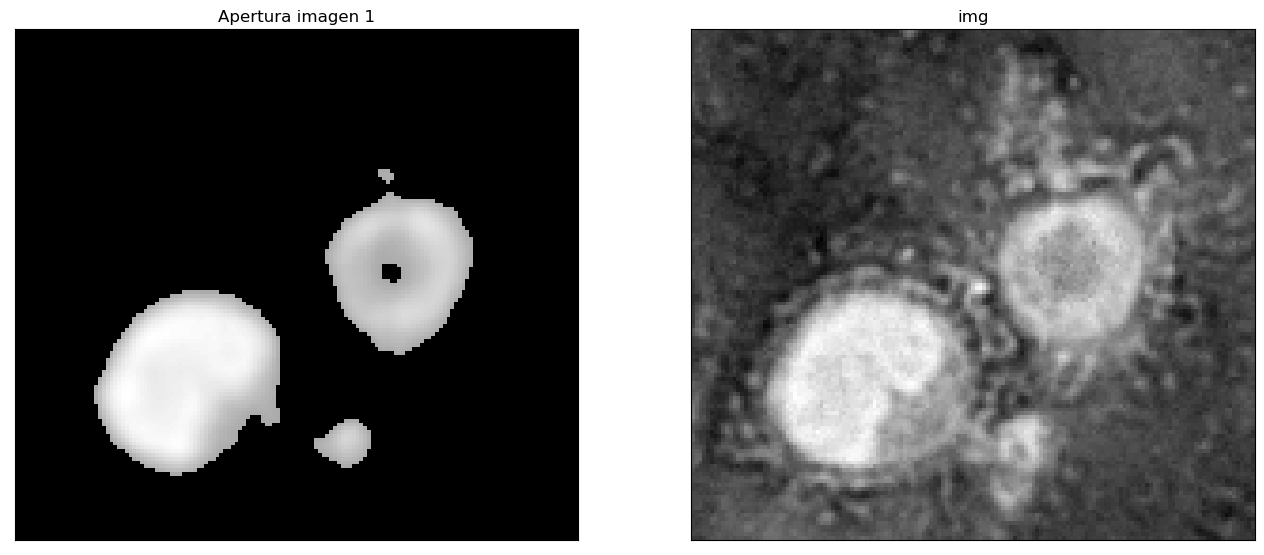

In [48]:
openning = cv2.GaussianBlur(S, (9,9), 7)
print(np.min(openning), np.max(openning), np.average(openning))
openning[openning < 90] = 0
openning[openning > 195] = 255

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('Apertura imagen 1')
plt.imshow(openning,cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('img')
plt.imshow(S, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
# openning

In [49]:
# Importación de las imagenes
img1 = cv2.imread('image_1.png')
img2 = cv2.imread('image_2.png')
img3 = cv2.imread('image_3.png')

img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
img3_hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)


img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Importación de las mascaras
mask1 = cv2.imread('image_1_mask.png')
mask2 = cv2.imread('image_2_mask.png')
mask3 = cv2.imread('image_3_mask.png')

mask1_rgb = cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB)
mask2_rgb = cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB)
mask3_rgb = cv2.cvtColor(mask3, cv2.COLOR_BGR2RGB)

mask1_gray = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
mask2_gray = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)
mask3_gray = cv2.cvtColor(mask3, cv2.COLOR_BGR2GRAY)

In [50]:
def detectar_leuco(img_bgr, contrast):
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img_hsv)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    img_gray_openning = cv2.morphologyEx(V, cv2.MORPH_OPEN, kernel, iterations=3)
    img_gray_openning[img_gray_openning > contrast] = 255

    [_, img_mask_OTSU] = cv2.threshold(img_gray_openning, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    # img_gray_openning = cv2.morphologyEx(img_mask_OTSU, cv2.MORPH_OPEN, kernel, iterations=6)

    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    #Separamos los objetos
    objects_erode = cv2.erode(img_mask_OTSU, kernel2, iterations = 9)    


    # Detectar las regiones
    kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    # Dilatamos los objetos
    objects_dilate = cv2.dilate(objects_erode, kernel3, iterations = 10)

    [cnt2, markers2] = cv2.connectedComponents(objects_dilate)
    print('Cantidad de objetos:', cnt2)

    plt.figure(figsize=(32,16))
    plt.subplot(121)
    plt.title('Apertura imagen 1')
    plt.imshow(objects_dilate, cmap='gray')
    plt.xticks([]), plt.yticks([])

    plt.subplot(122)

    plt.title('mascara')
    plt.imshow(mask2_gray, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [51]:
#detectar_leuco(img2, 170)

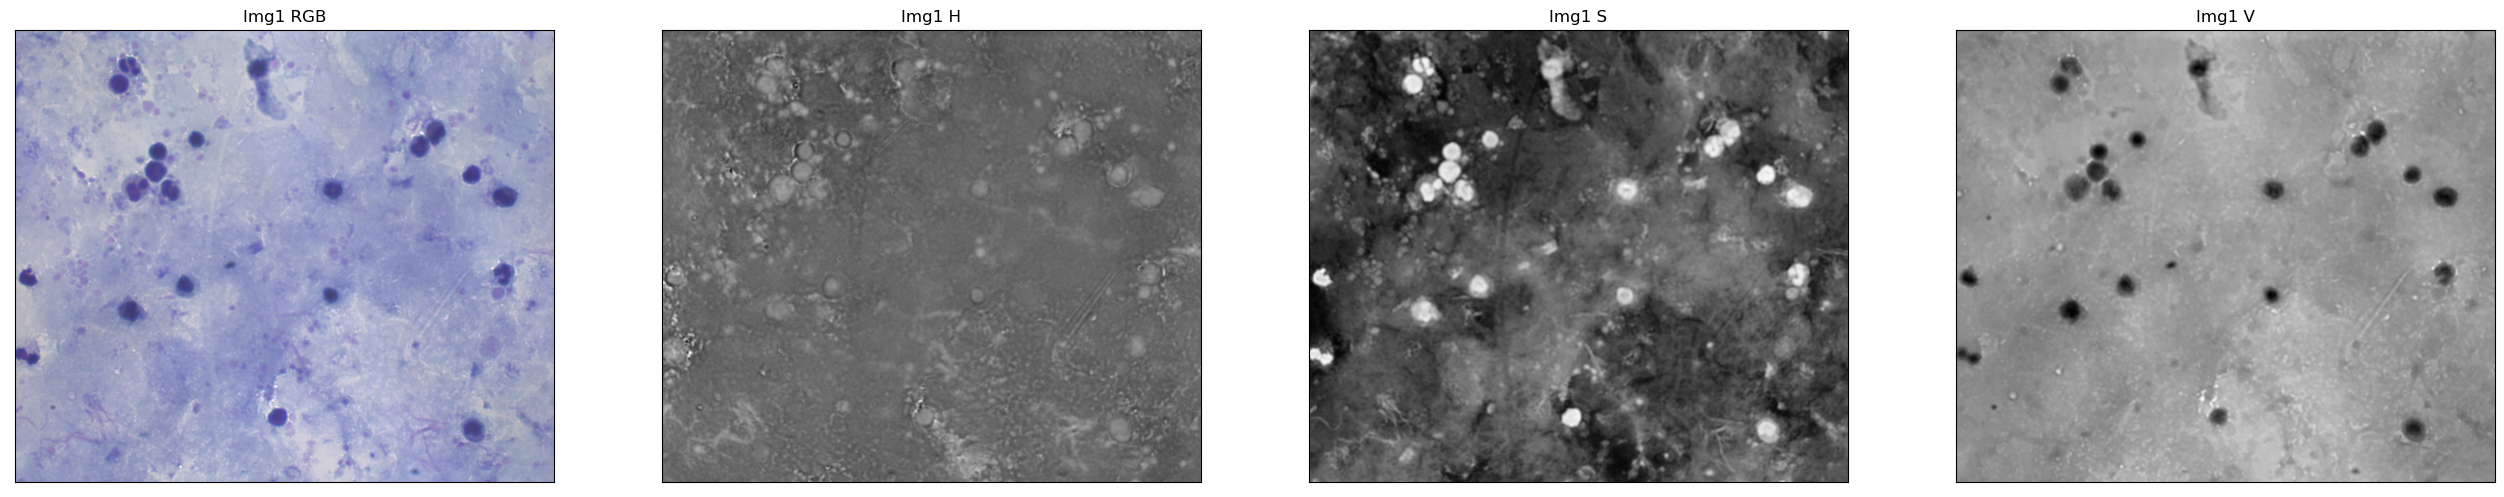

In [68]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8976187/
img1_hsv = cv2.GaussianBlur(img1_hsv, (9,9), 7)
H, S, V = cv2.split(img1_hsv)

plt.figure(figsize=(32,16))

plt.subplot(141) # Posición 1 de 4
plt.title('Img1 RGB')
plt.imshow(img1_rgb)
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.subplot(142) # Posición 2 de 4
plt.title('Img1 H')
plt.imshow(H, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.subplot(143) # Posición 3 de 4
plt.title('Img1 S')
plt.imshow(S, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.subplot(144) # Posición 3 de 4
plt.title('Img1 V')
plt.imshow(V, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.show()

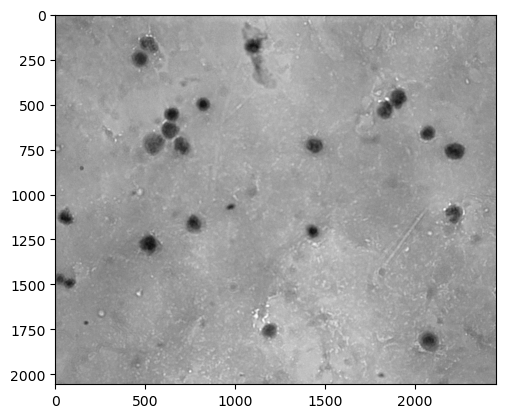

In [64]:
R,G,B = cv2.split(img1_rgb)
plt.imshow(B, cmap='gray')

In [53]:
# S[S < 100] = 0

# V[V < 185] = 0
# V[V > 185] = 255
img1_gray_openning[img1_gray_openning > 155] = 255

img1_hsv = cv2.merge((H, S, V))
img1_rgb = cv2.cvtColor(img1_hsv, cv2.COLOR_HSV2RGB)
img1_gray = cv2.cvtColor(img1_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(16,8))
plt.title('Apertura imagen 1')
plt.imshow(cv2.subtract(S,V,H),cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

NameError: name 'img1_gray_openning' is not defined

In [71]:
img1_hsv = cv2.merge((H, S, img1_gray_openning))
img1_rgb = cv2.cvtColor(img1_hsv, cv2.COLOR_HSV2RGB)
img1_gray = cv2.cvtColor(img1_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(16,8))
plt.title('Apertura imagen 1')
plt.imshow(img1_gray, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

NameError: name 'img1_gray_openning' is not defined

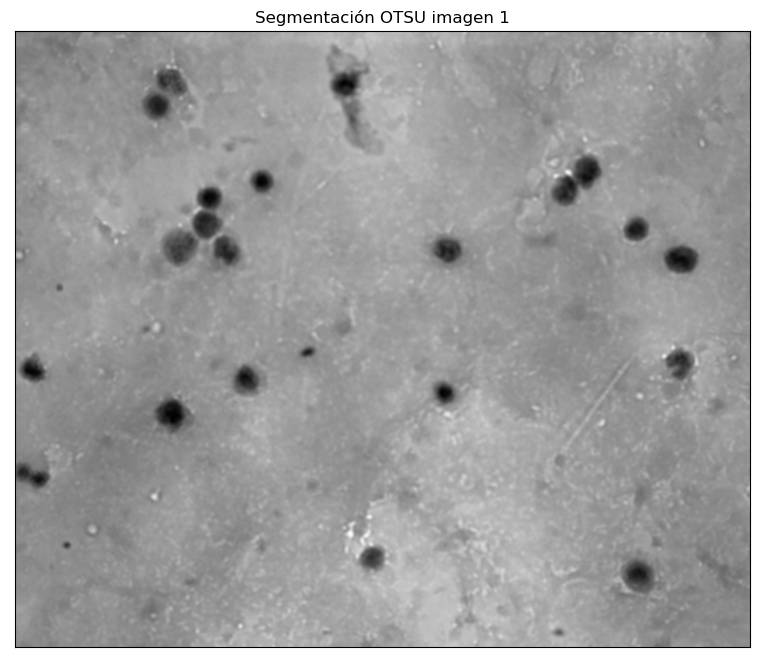

In [69]:
plt.figure(figsize=(16,8))
plt.title('Segmentación OTSU imagen 1')
plt.imshow(V, cmap = 'gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

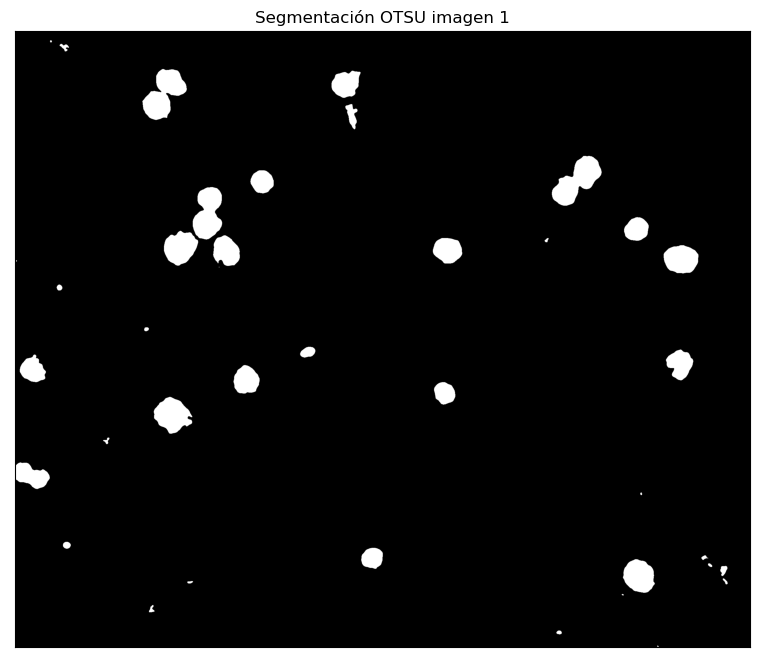

In [70]:
_ , img1_mask_OTSU = cv2.threshold(V, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure(figsize=(16,8))
plt.title('Segmentación OTSU imagen 1')
plt.imshow(img1_mask_OTSU, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Obtención y ploteo de la umbralización con OTSU
_, img1_mask_OTSU = cv2.threshold(cv2.subtract(S,V,H), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(16,8))
plt.title('Segmentación OTSU imagen 1')
plt.imshow(img1_mask_OTSU, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

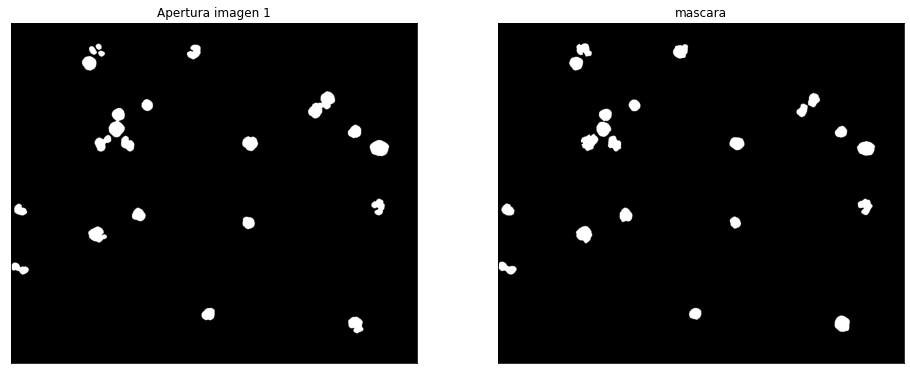

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
img1_gray_openning = cv2.morphologyEx(img1_mask_OTSU, cv2.MORPH_OPEN, kernel, iterations=5)

#img1_gray_openning = cv2.GaussianBlur(img1_mask_OTSU, (9,9), 7)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('Apertura imagen 1')
plt.imshow(img1_gray_openning,cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)

plt.title('mascara')
plt.imshow(mask1_gray,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


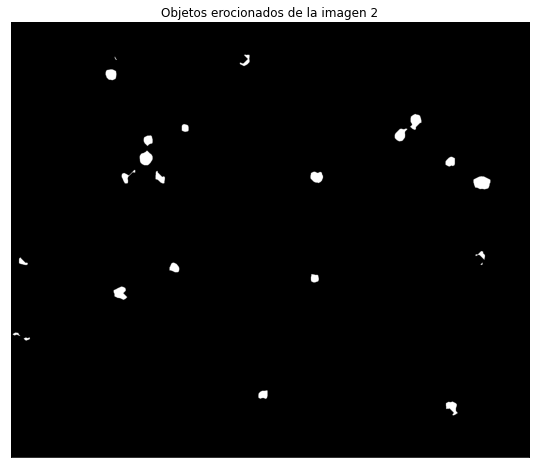

In [ ]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
print(kernel2)
#Separamos los objetos
objects_erode = cv2.erode(img1_gray_openning, kernel2, iterations = 6)

plt.figure(figsize=(16,8))
plt.title('Objetos erocionados de la imagen 2')
plt.imshow(objects_erode, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

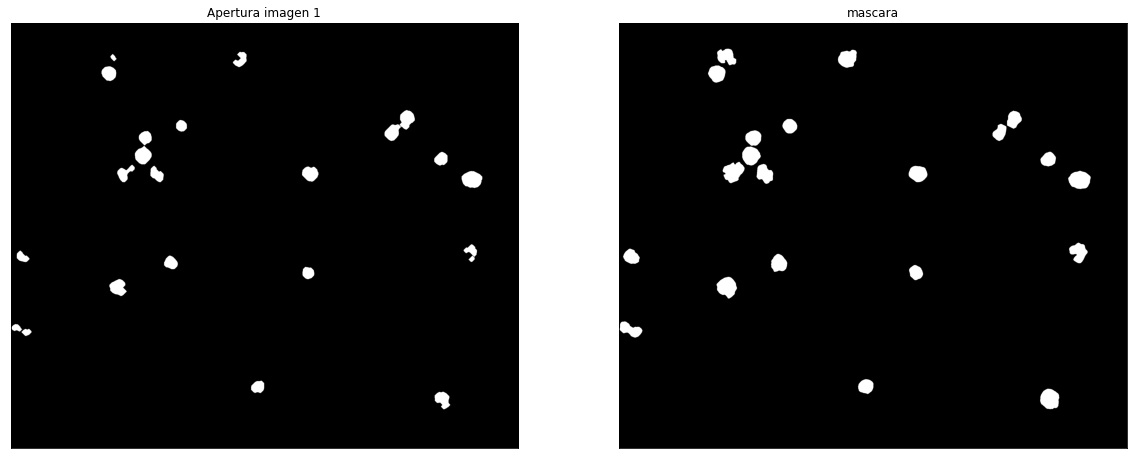

In [ ]:
# Detectar las regiones
kernel2 = cv2.getStructuringElement(cv2.MORPH_DILATE,(5,5))
# Dilatamos los objetos
objects_dilate = cv2.dilate(objects_erode, kernel2, iterations = 5)


plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Apertura imagen 1')
plt.imshow(objects_dilate,cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)

plt.title('mascara')
plt.imshow(mask1_gray,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

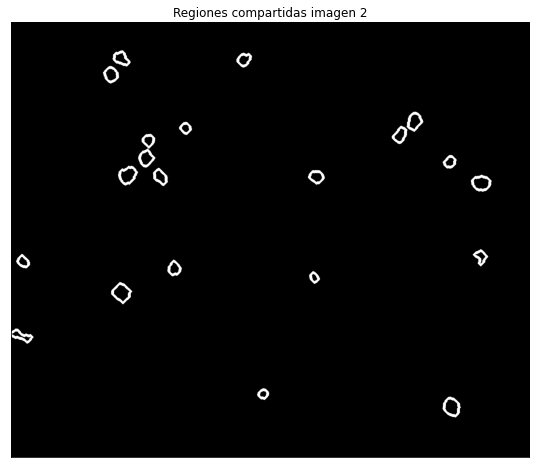

In [ ]:
# Detectar la regiones compartidas
unknown = cv2.subtract(objects_dilate, objects_erode)

plt.figure(figsize=(16,8))
plt.title('Regiones compartidas imagen 2')
plt.imshow(unknown,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

Cantidad de objetos: 22


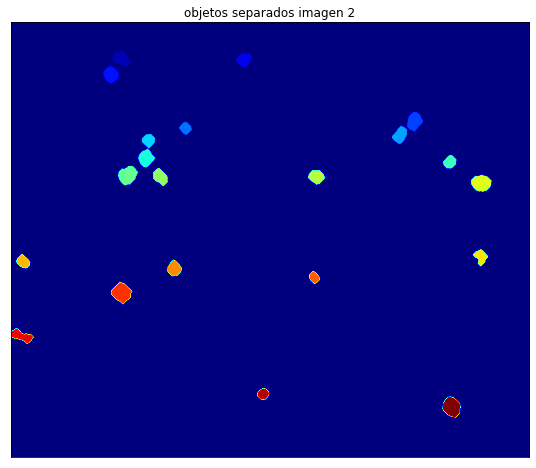

In [ ]:
[cnt2, markers2] = cv2.connectedComponents(objects_dilate)
print('Cantidad de objetos:', cnt2)

plt.figure(figsize=(16,8))
plt.title('objetos separados imagen 2')
plt.imshow(markers2,cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()